In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier as knn

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

In [3]:
iris = sns.load_dataset('iris')

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.isnull().any().any()

False

In [5]:
species = iris['species'].unique().tolist()
species

['setosa', 'versicolor', 'virginica']

In [6]:
iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [7]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


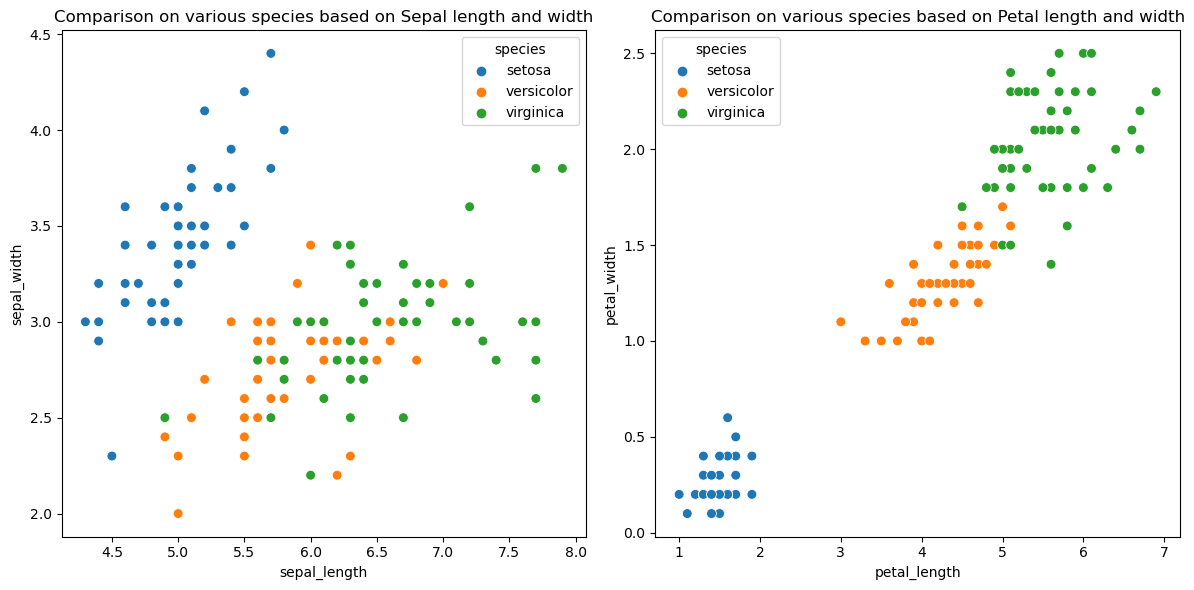

In [8]:
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
plt.title('Comparison on various species based on Sepal length and width')
sns.scatterplot(x= iris['sepal_length'], y= iris['sepal_width'], hue=iris['species'], s=50)


plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
plt.title('Comparison on various species based on Petal length and width')
sns.scatterplot(x=iris['petal_length'], y=iris['petal_width'], hue=iris['species'], s=50)

plt.tight_layout()


In [9]:
x = iris.drop("species", axis=1)
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<Axes: >

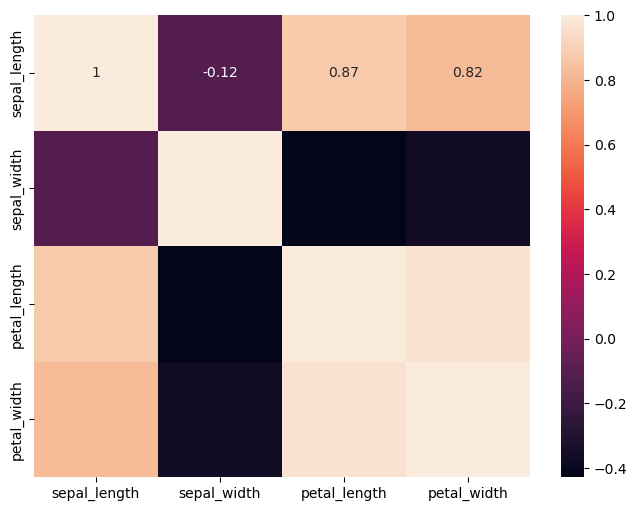

In [10]:
plt.figure(figsize=(8,6))
correlation_matrix = x.corr()
sns.heatmap(data=correlation_matrix, annot=True)


# petal_length and petal_width are highly correlated
# petal_width and sepal_length has good correlation

In [11]:
y = iris['species']
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=5)

In [13]:
classifier = knn(n_neighbors=50)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [14]:
y_pred = classifier.predict(x_test)
y_pred

array(['versicolor', 'virginica', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'virginica', 'setosa',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'virginica'],
      dtype=object)

In [15]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.9666666666666667


[[ 8  0  0]
 [ 0 11  0]
 [ 0  1 10]]


<Axes: >

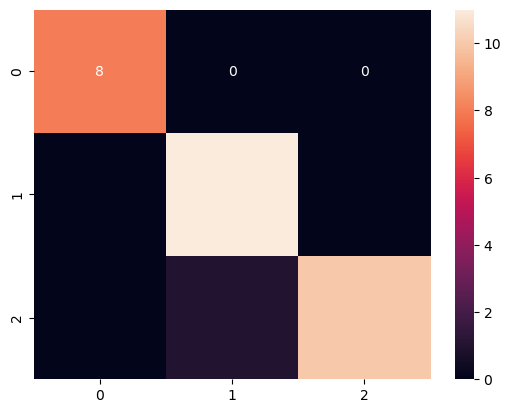

In [16]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)

In [17]:
values = range(1, 101)
best_values = []

for k in values:
    classifier = knn(n_neighbors = k)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print("For k = {}; Accuracy: {}".format(k, acc))
    if acc == 1.0:
        best_values.append(k);

print(best_values)

For k = 1; Accuracy: 0.9
For k = 2; Accuracy: 0.9
For k = 3; Accuracy: 0.9333333333333333
For k = 4; Accuracy: 0.9333333333333333
For k = 5; Accuracy: 0.9333333333333333
For k = 6; Accuracy: 0.9666666666666667
For k = 7; Accuracy: 0.9666666666666667
For k = 8; Accuracy: 1.0
For k = 9; Accuracy: 0.9666666666666667
For k = 10; Accuracy: 0.9666666666666667
For k = 11; Accuracy: 0.9666666666666667
For k = 12; Accuracy: 0.9666666666666667
For k = 13; Accuracy: 0.9666666666666667
For k = 14; Accuracy: 0.9666666666666667
For k = 15; Accuracy: 0.9666666666666667
For k = 16; Accuracy: 1.0
For k = 17; Accuracy: 1.0
For k = 18; Accuracy: 1.0
For k = 19; Accuracy: 0.9666666666666667
For k = 20; Accuracy: 1.0
For k = 21; Accuracy: 1.0
For k = 22; Accuracy: 1.0
For k = 23; Accuracy: 1.0
For k = 24; Accuracy: 1.0
For k = 25; Accuracy: 1.0
For k = 26; Accuracy: 1.0
For k = 27; Accuracy: 0.9666666666666667
For k = 28; Accuracy: 0.9666666666666667
For k = 29; Accuracy: 1.0
For k = 30; Accuracy: 0.966666

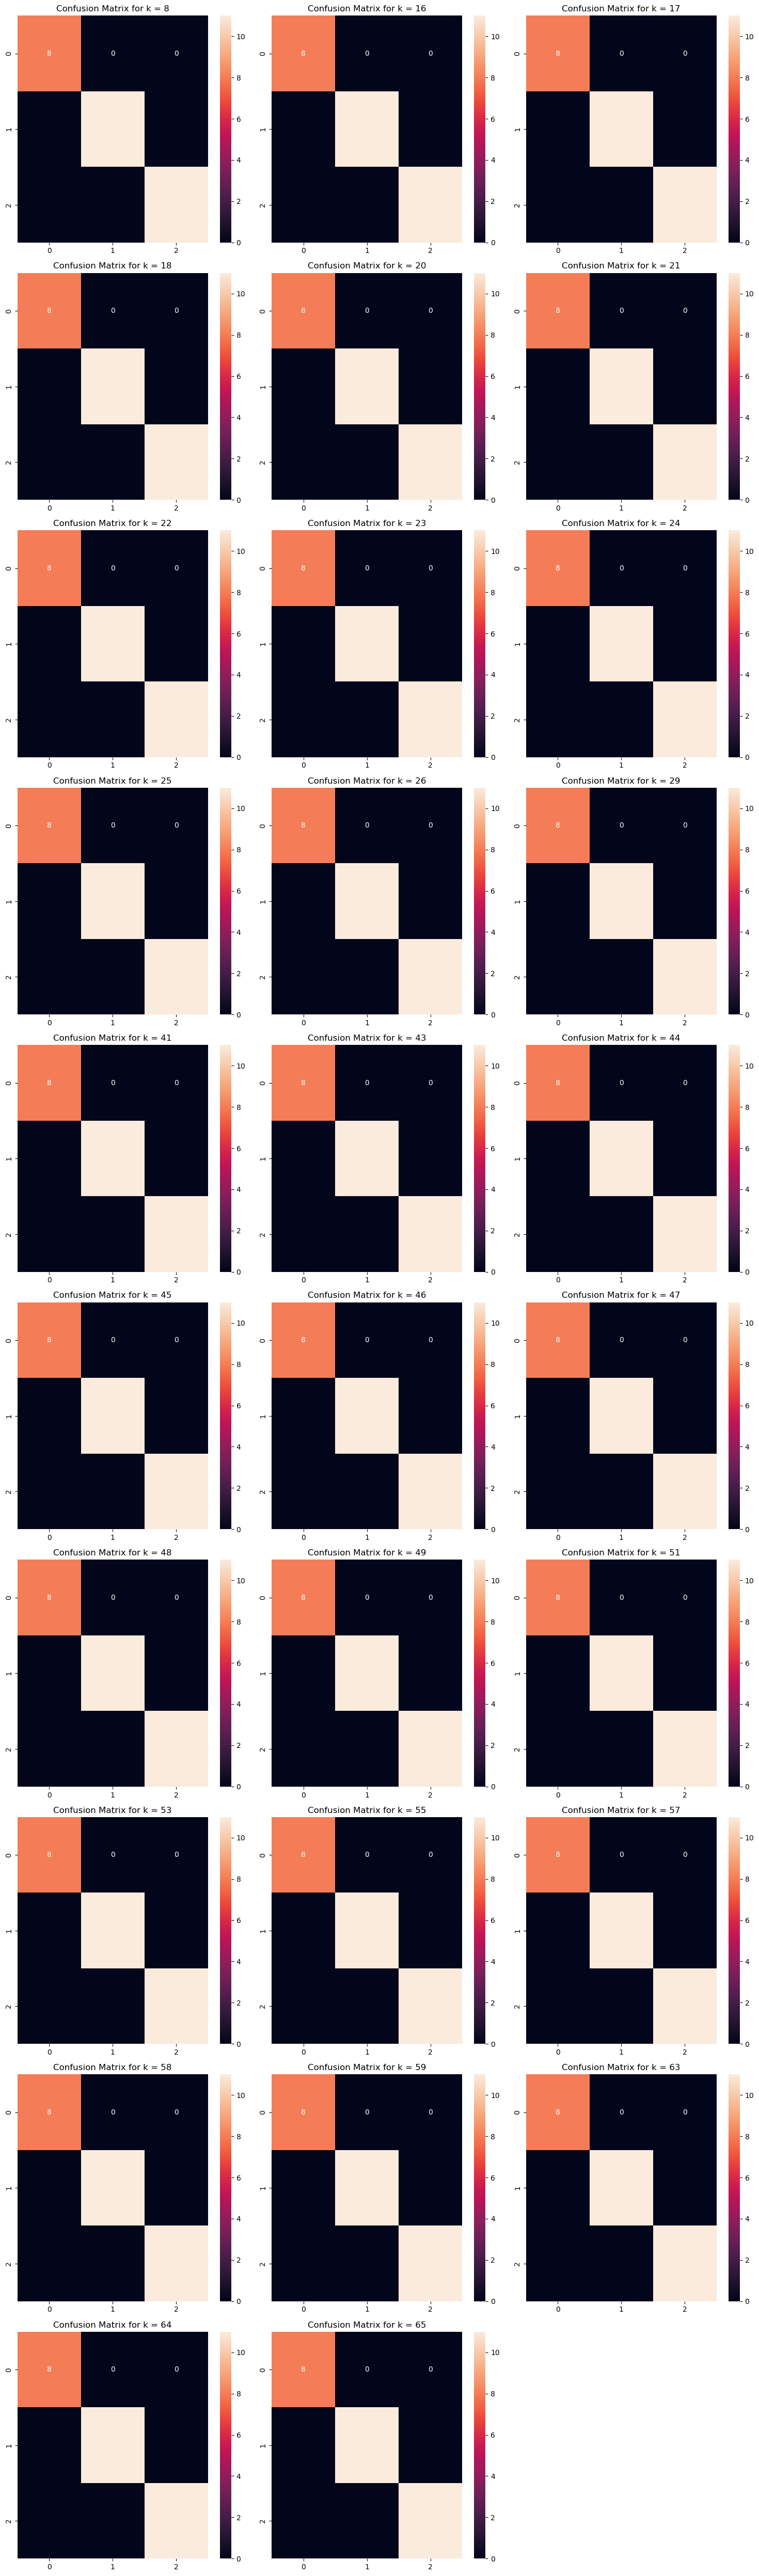

In [18]:
num_rows = (len(best_values) + 2) // 3  # Ceiling division to ensure we have enough rows

# Set the figure size based on the number of rows and the desired width
plt.figure(figsize=(15, num_rows * 5))

# Iterate through each value of k in best_values
for i, k in enumerate(best_values, 1):
    plt.subplot(num_rows, 3, i)  # Total rows: num_rows, Total columns: 3, Current subplot index: i
    plt.title(f'Confusion Matrix for k = {k}')
    
    
    classifier = knn(n_neighbors=k)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    
    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot=True)

plt.tight_layout()

plt.show()

In [19]:
classifier = knn(n_neighbors=51)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
